## **Imersão Dados 4ª edição**

*Aluno:* <br>
* Lukas Barbosa Veiga de Melo, 25;
* Engenheiro Ambiental;
* Mestrando em Desenvolvimento e Meio Ambiente, UFPB.
<br>
<br>

**[LinkedIn](www.linkedin.com/in/lukas-veiga-79371b20a
)** <br>
**[GitHub](https://github.com/Lukasveiga)**

## **Dataset: House price data of São Paulo (Adaptado)**

*Variáveis:*

* Rua - Localização da Rua onde a casa pertence;
* Bairro - Localização do Bairro onde a casa pertence
* Cidade - Cidade onde a Casa está localizada;
* Metragem - Área da casa em metros quadrados;
* Quartos - Número de quartos na casa;
* Banheiros - Número de banheiros na casa;
* Vagas - Número de vagas na garagem;
* Valor - Preço da casa que está em moeda brasileira BRL;
<br>

**Fonte(Original):** https://www.kaggle.com/datasets/kaggleshashankk/house-price-data-of-sao-paulo <br>
**Fonte(Adaptado):** https://gist.github.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891

In [69]:
# Bibliotecas básicas
import numpy as np
import pandas as pd

# Bibliotecas de Visualização
import seaborn as sns
import matplotlib.pyplot as plt

## Confgurações de Visualização
sns.set_style('darkgrid')
sns.set_context('paper', font_scale= 1.2)

In [70]:
# Importação do banco de dados
path = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
data = pd.read_csv(path)

In [71]:
# Primeiras linhas
print(data.shape)
data.head(10)

(10008, 8)


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$ 850.000
7,"Rua Guilherme Valente, 150",Jardim Vergueiro,São Paulo,150,2,2,2,R$ 450.000
8,"Rua Sagrada Família, 8",Jardim Benfica,São Paulo,48,2,1,1,R$ 199.900
9,Rua Tapaji,Vila Alpina,São Paulo,114,3,3,2,R$ 585.000


In [72]:
# Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


**OBS:** Quando utilizamos a função `.info()` é possível verificar o tipo de dado para cada variável. Quando uma variável retorna o tipo como *objeto* é possível que exista algum erro ou valor faltante, sendo necessário verificar mais a fundo essas variáveis.

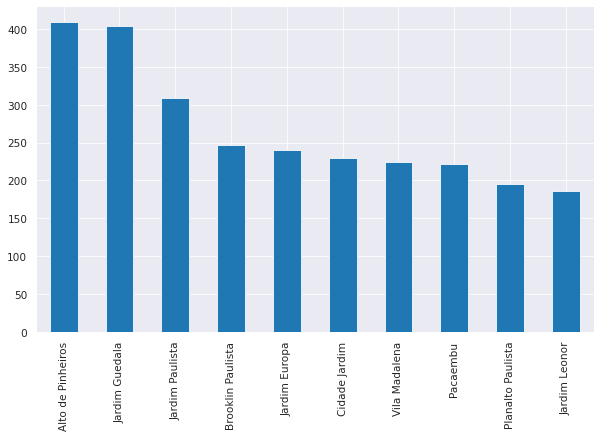

In [73]:
data['Bairro'].value_counts().sort_values(ascending= False)[:10].plot(kind= 'bar', figsize = (10,6))

### **Desafios da Aula 1**

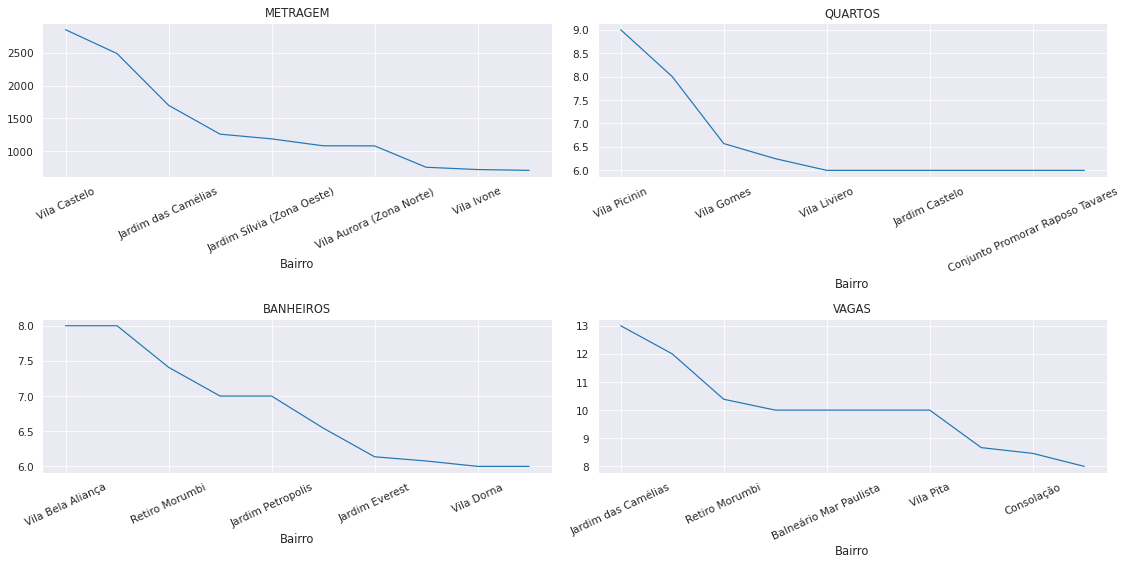

In [88]:
# 1 - Realizar a média da metragem para cada um dos bairros. (Proposto pelo Paulo) + quartos, vagas e banheiros
'''Foram selecionandos apenas os 10 bairros com as maiores medias por conta do grande numero de bairros'''
media_metragem_bairro = data.groupby('Bairro').mean()

cols = list(media_metragem_bairro.columns)

for n, col in enumerate(cols):

  ax = plt.subplot(2,2, n + 1)

  (media_metragem_bairro[col]
   .sort_values(ascending= False)[1:11]  # exclusao de possiveis outliers
   .plot(figsize = (16,8), ax = ax))
  
  ax.set_title(col.upper())
  ax.tick_params(axis = 'x', rotation = 25)

plt.tight_layout()

In [75]:
# 2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas). (Proposto pelo Thiago)

# Query 1:
tem_imoveis_vila = data['Bairro'] == 'Vila Mariana'
data[tem_imoveis_vila]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [76]:
# Query 2:
data[data['Bairro'] == 'Vila Mariana']

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


In [77]:
# Query 3:
data.query("Bairro == 'Vila Mariana'")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
100,Rua Pero Correia,Vila Mariana,São Paulo,250,3,3,1,R$ 1.350.000
120,Praça Doutor Carvalho Franco,Vila Mariana,São Paulo,250,3,5,2,R$ 2.450.000
155,Rua Professor João Marinho,Vila Mariana,São Paulo,170,3,4,2,R$ 1.490.000
160,NaN,Vila Mariana,São Paulo,228,4,5,3,R$ 2.200.000
334,"Rua Pero Correia, 892",Vila Mariana,São Paulo,350,6,4,10,R$ 1.700.000
...,...,...,...,...,...,...,...,...
9645,Rua Sousa Ramos,Vila Mariana,São Paulo,285,3,5,5,R$ 1.650.000
9701,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9737,Rua Benito Juarez,Vila Mariana,São Paulo,171,3,2,4,R$ 1.650.000
9807,NaN,Vila Mariana,São Paulo,275,3,1,6,R$ 1.500.000


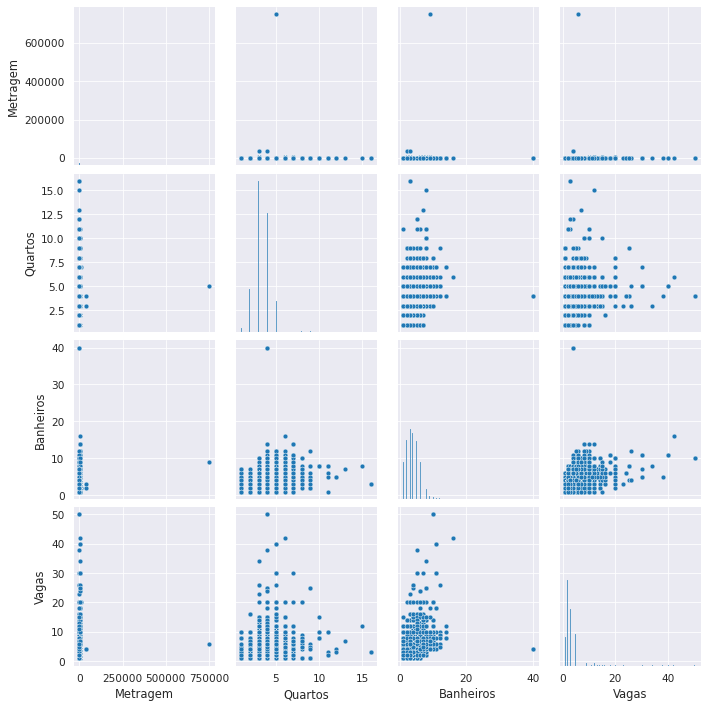

In [78]:
# 3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão. (Proposto pelo Thiago)
sns.pairplot(data)

*O dataset apresenta alguns valores de outliers que talvez interfiram nas analises graficas e posteriormente na construcao do modelo. Por isso iremos identifica-los e verificar a real necessidade de remocao desses valores.*

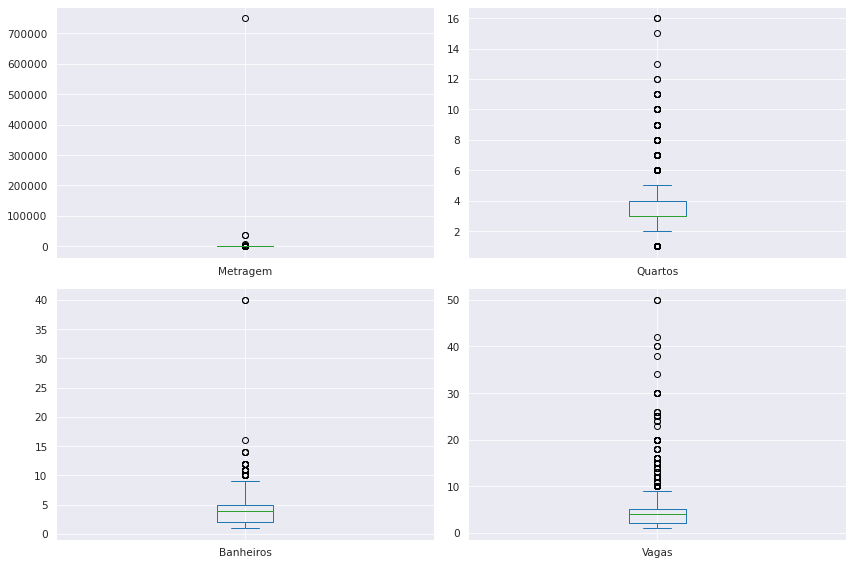

In [79]:
# Outliers
plt.figure(figsize = (12,8))
cols = list(media_metragem_bairro.columns)

for n, col in enumerate(cols):

  ax = plt.subplot(2,2, n + 1)

  data[col].plot(kind= 'box', ax=ax)

plt.tight_layout()

In [80]:
# Metodo Z-Score
from scipy import stats

z = np.abs(stats.zscore(data[cols]))
print(z)


[[0.07421145 0.4857285  2.0725052  0.67381838]
 [0.00714562 0.4857285  0.06080528 0.03442868]
 [0.04222229 0.4857285  0.4421197  0.74267573]
 ...
 [0.03157692 0.45399136 0.4421197  0.67381838]
 [0.03423826 0.45399136 0.94504468 0.74267573]
 [0.04262149 0.45399136 0.94504468 0.74267573]]


* **Z-Score:**Nos da uma ideia de quao longe da media o dado esta. Tecnicamente falando e a medida de quantos desvios padrao abaixo ou acima da media da populacao o dado esta.

In [81]:
# Na maioria dos casos o outlier e indetificando quando apresenta um valor acima de 3
filtered_entries = (z < 3).all(axis=1)
new_data = data[filtered_entries]

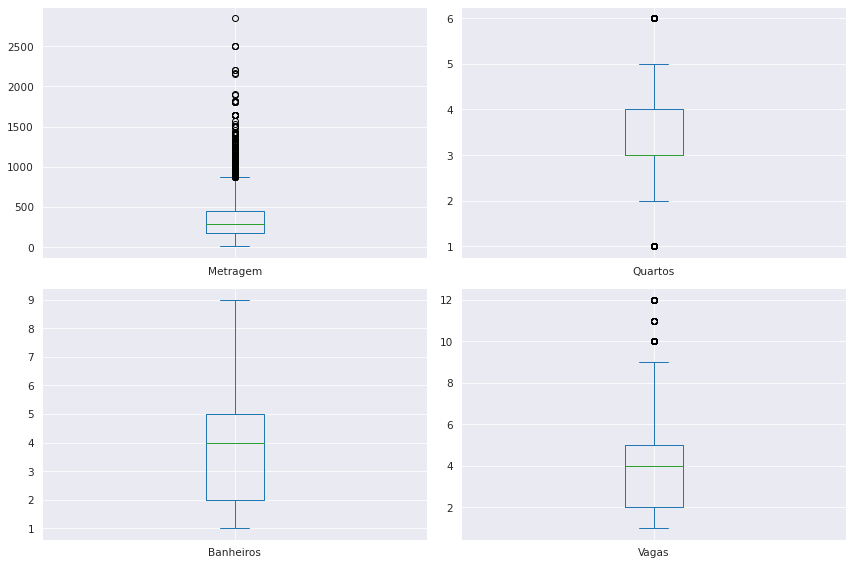

In [82]:
# Sem outliers
plt.figure(figsize = (12,8))

for n, col in enumerate(cols):

  ax = plt.subplot(2,2, n + 1)

  new_data[col].plot(kind= 'box', ax=ax)

plt.tight_layout()

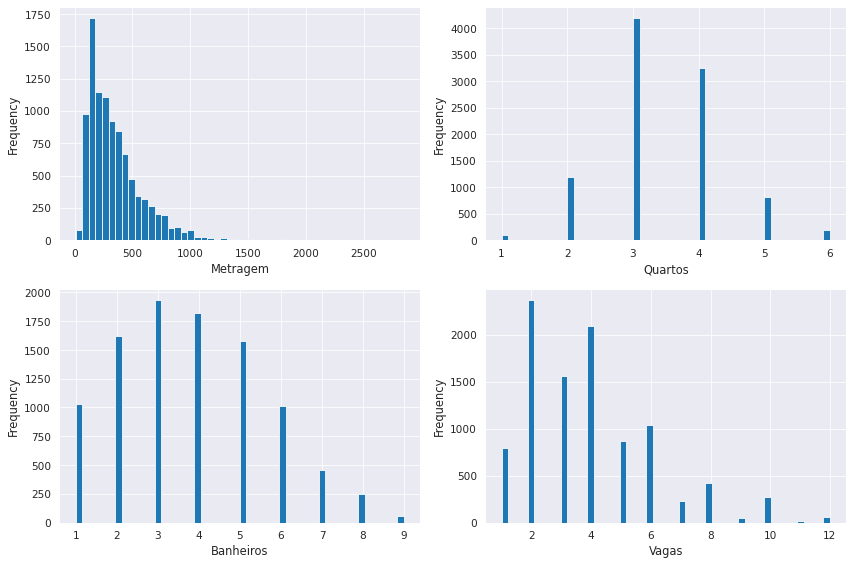

In [94]:
# Histogramas
plt.figure(figsize = (12,8))
cols = list(media_metragem_bairro.columns)

for n, col in enumerate(cols):

  ax = plt.subplot(2,2, n + 1)

  new_data[col].plot(kind= 'hist', bins = 50, ax=ax)
  ax.set_xlabel(col)

plt.tight_layout()

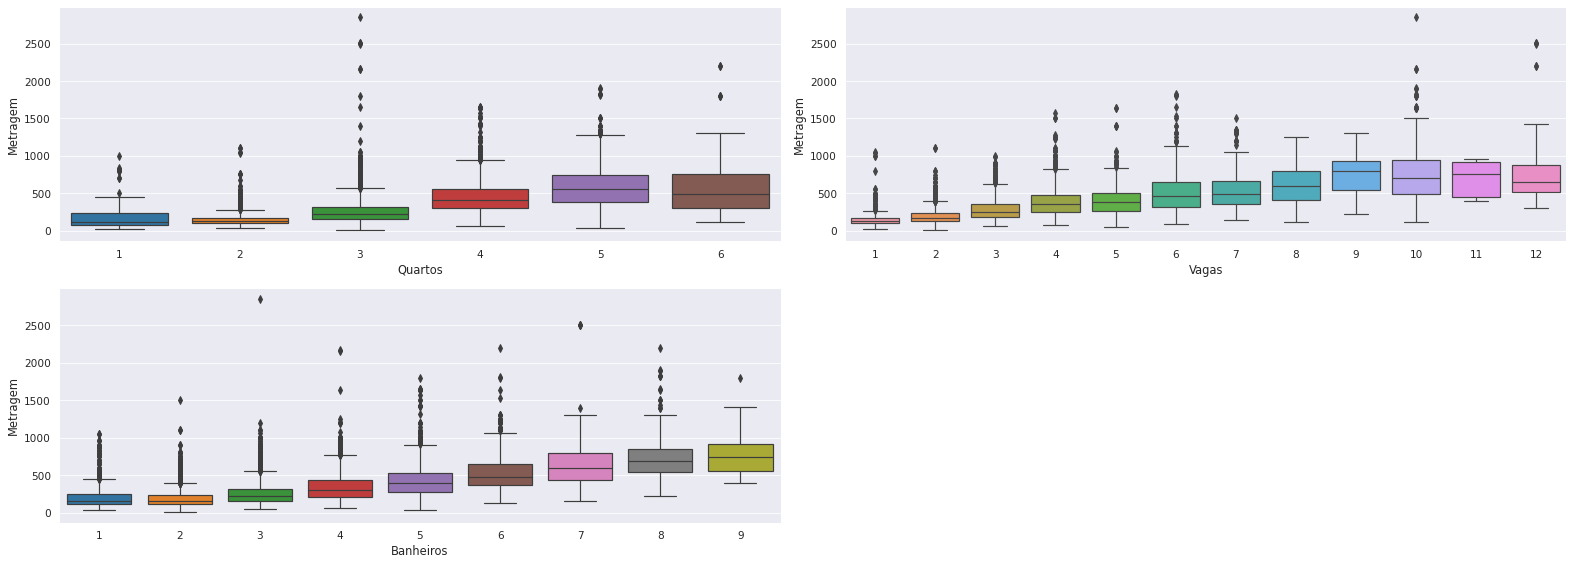

In [83]:
fig, ax = plt.subplots(2,2, figsize = (22,8))

sns.boxplot(data= new_data, x = 'Quartos', y = 'Metragem', ax = ax[0,0])
sns.boxplot(data= new_data, x = 'Vagas', y = 'Metragem', ax = ax[0,1])
sns.boxplot(data= new_data, x = 'Banheiros', y = 'Metragem', ax = ax[1,0])

fig.delaxes(ax[1,1])
fig.tight_layout()

**Insides iniciais:**Após a remoção dos valores outliers e possível visualizar uma relação entre a metragem e as variáves caracteristicas das casas como o número de quartos, banheiros e vagas na garagem.

In [84]:
# 4 - Pegar outras estatísticas dos dados (como média, mediana, mim, max). (Proposto pela Vivian)
data.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


In [85]:
# 5 - Descobrir quais são os bairros que não tem nome de rua. (Proposto pela Vivian)

# Ruas sem o nome do Bairro
data[data['Bairro'].isnull()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
7263,"Rua Madalena de Morais, 3773",NaN,São Paulo,742,4,8,6,R$ 9.800\n /Mês
7956,Rua Vergueiro,NaN,São Paulo,103,3,2,2,R$ 640.000
7996,"Rua Alvorada do Sul, 3773",NaN,São Paulo,678,4,8,8,R$ 6.895.000
8126,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,550,3,5,6,R$ 4.000.000
8566,"Avenida Comendador Adibo Ares, 3773",NaN,São Paulo,694,4,6,6,R$ 3.890.000
8619,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,R$ 6.895.000
8739,"Rua Alvorada do Sul, 3773",NaN,São Paulo,683,4,8,8,R$ 6.895.000
8868,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,R$ 4.000.000
8943,"Rua Santo Eufredo, 3773",NaN,São Paulo,846,4,8,8,R$ 30.000\n /Mês
8992,"Rua Professor Eduardo Monteiro, 3773",NaN,São Paulo,555,3,5,6,R$ 4.000.000


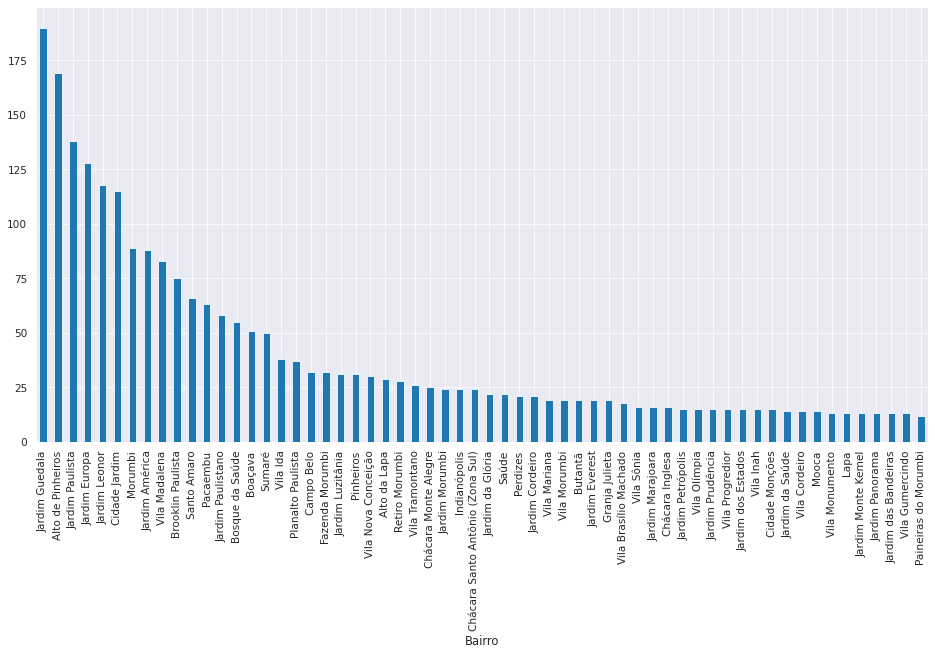

In [86]:
# Bairros sem o nome da rua
(data[data['Rua'].isnull()]
 .value_counts('Bairro')[:60]
 .plot(kind = 'bar', figsize = (16,8)));